
**Predictive Modeling for Disease Diagnosis**
# Nouvelle section


 **1-Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv("/content/Train_data.csv")
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
test_data=pd.read_csv("/content/test_data.csv")

In [ ]:
train_data.shape

(2351, 25)

In [ ]:
test_data.shape

(486, 25)

In [ ]:
train_data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [ ]:
train_data.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [ ]:
test_data.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

->We don't have any null value

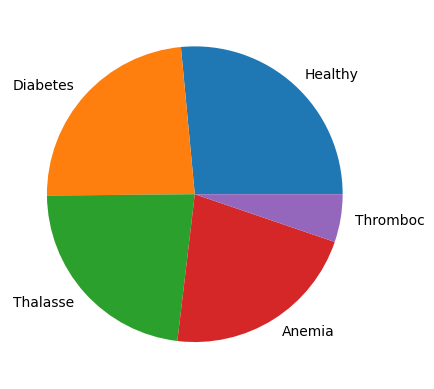

In [ ]:
Disease=train_data['Disease'].unique()
plt.pie(train_data['Disease'].value_counts(),labels=Disease)
plt.show()

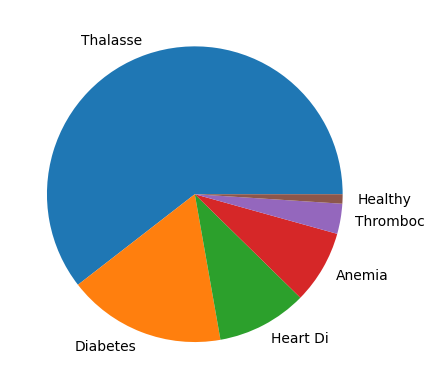

In [ ]:
Disease=test_data['Disease'].unique()
plt.pie(test_data['Disease'].value_counts(),labels=Disease)
plt.show()

In [ ]:
Disease=test_data['Disease'].unique()
print(Disease)


['Thalasse' 'Diabetes' 'Heart Di' 'Anemia' 'Thromboc' 'Healthy']


In [ ]:
diseases = ['Thalasse' ,'Diabetes' ,'Heart Di' ,'Anemia' ,'Thromboc']
# Create a new binary target variable
train_data['Diseases'] = train_data['Disease'].apply(lambda x: 1 if x in diseases else 0)
test_data['Diseases'] = test_data['Disease'].apply(lambda x: 1 if x in diseases else 0)


train_data.drop(columns=['Disease'], inplace=True)
test_data.drop(columns=['Disease'], inplace=True)
# Save the modified dataset
train_data.to_csv('Train.csv', index=False)
test_data.to_csv('test.csv',index=False)

In [ ]:
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Diseases
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1


In [ ]:
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Diseases
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,1
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,1
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,1


In [ ]:
X_train = train_data[['Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells','Red Blood Cells','Hematocrit','Mean Corpuscular Volume','Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration','Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure','Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol','ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein']]
y_train = train_data[['Diseases']]

X_test = test_data[['Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells','Red Blood Cells','Hematocrit','Mean Corpuscular Volume','Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration','Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure','Triglycerides','HbA1c','LDL Cholesterol','HDL Cholesterol','ALT','AST','Heart Rate','Creatinine','Troponin','C-reactive Protein']]
y_test = test_data[['Diseases']]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_result(predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"The accuracy of this model is: {accuracy:.4f}")
    print(f"The precision of this model is: {precision:.4f}")
    print(f"The recall of this model is: {recall:.4f}")
    print(f"The F1-score of this model is: {f1:.4f}")

**2-Machine learning**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
Knn=KNeighborsClassifier()
k_values=[7]
pipe=Pipeline(steps=[('knn',Knn)])
param_grid={'knn__n_neighbors':k_values}
cv_classifier=GridSearchCV(pipe,param_grid,cv=3,scoring='accuracy')
cv_classifier.fit(X_train,y_train)
print(cv_classifier.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'knn__n_neighbors': 7}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
pred_knn=cv_classifier.predict(X_test)
model_result(pred_knn)

The accuracy of this model is: 0.6193
The precision of this model is: 0.9933
The recall of this model is: 0.6195
The F1-score of this model is: 0.7631


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rcls=RandomForestClassifier()
n_estimators=[32,64,128]
max_features=[2,3]
bootstrap=[True,False]
oob_score=[True,False]
param_grid_RF={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}
grid_rfr=GridSearchCV(rcls,param_grid_RF)
grid_rfr.fit(X_train,y_train)
print(grid_rfr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32, 'oob_score': True}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

In [ ]:
predict_rfr=grid_rfr.predict(X_test)
model_result(predict_rfr)

The accuracy of this model is: 0.9568
The precision of this model is: 0.9915
The recall of this model is: 0.9647
The F1-score of this model is: 0.9779


 *the more accurate algorithm in this case is the randomfrorest so we gonna use it
 *

In [ ]:
new_individual=np.array([0.5,0.65,0.72,0.8,0.7,0.7,0.2,0.6,0.0013,0.9,0.03,0.07,0.185,0.08,0.6,0.507,0.23,0.51,0.02,0.69,0.9,0.09,0.46,0.76])
prediction=grid_rfr.predict(new_individual.reshape(1,-1))
if prediction[0] == 0:
    print("The new induvidual is diseased ?: no")
else:
    print("The new induvidual is diseased ?: yes")

The new induvidual is diseased ?: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
